# Display timings
**Author: M.Ravasi**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Kirchhoff_Volve_timings.txt', sep="\t", header=None)
df.columns = ["Rank", "Time imaging", "Time overall"]
df = df.sort_values("Rank")

# Extrapolate time of single rank
time_rank = df["Time imaging"][0] * df["Rank"][0]
timeove_rank = df["Time overall"][0] * df["Rank"][0]

df2 = pd.DataFrame([[1, time_rank,  timeove_rank]], columns=["Rank", "Time imaging", "Time overall"])
df = pd.concat([df2, df])

df["Speedup"] = time_rank / df["Time imaging"] 
df["Speedup overall"] = timeove_rank / df["Time overall"] 
df

,Rank,Time imaging,Time overall,Speedup,Speedup overall
0,1,2396.520,11147.280,1.000000,1.000000
5,6,387.933,1594.403,6.177665,6.991507
6,8,327.057,1258.943,7.327530,8.854476
0,10,239.652,1114.728,10.000000,10.000000
1,12,208.323,881.545,11.503867,12.645163
2,14,188.684,790.649,12.701236,14.098898
3,16,190.200,737.438,12.600000,15.116227
4,18,189.609,716.143,12.639273,15.565718


Text(0, 0.5, 'Speedup overall')

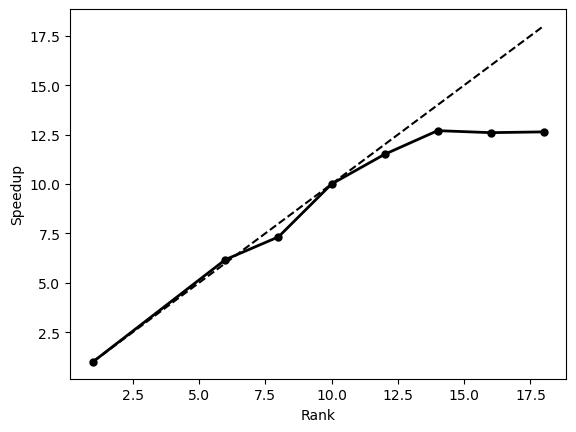

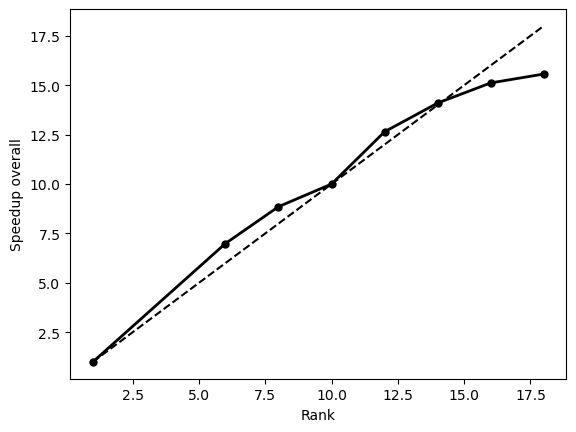

In [3]:
plt.figure()
plt.plot(df["Rank"], df["Speedup"], '.-k', lw=2, ms=10)
plt.plot([df["Rank"].values[0], df["Rank"].values[-1]],[df["Rank"].values[0], df["Rank"].values[-1]], '--k')
plt.xlabel('Rank')
plt.ylabel('Speedup')

plt.figure()
plt.plot(df["Rank"], df["Speedup overall"], '.-k', lw=2, ms=10)
plt.plot([df["Rank"].values[0], df["Rank"].values[-1]],[df["Rank"].values[0], df["Rank"].values[-1]], '--k')
plt.xlabel('Rank')
plt.ylabel('Speedup overall')